# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Put your name here.</p>
### <p style="text-align: right;"> &#9989; Put your _GitHub username_ here.</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [2]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Ontario','Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    # Complete the remaining continents
    'South America': {
        'Venezuela': ['Central America', 'Peru', 'Brazil'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Brazil': ['Venezuela', 'Argentina', 'Peru', 'North Africa'],
        'Argentina': ['Peru', 'Brazil']
        # Add territories and their connections
    },
    'Europe': {
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Great Britain': ['Western Europe', 'Iceland', 'Scandinavia', 'Northern Europe'],
        'Western Europe': ['Great Britain', 'Southern Europe', 'North Africa', 'Northern Europe'],
        'Southern Europe': ['Egypt', 'Western Europe', 'North Africa', 'Northern Europe', 'Ukraine', 'Middle East'],
        'Northern Europe': ['Western Europe', 'Southern Europe', 'Great Britain', 'Scandinavia', 'Ukraine'],
        'Ukraine': ['Southern Europe', 'Northern Europe', 'Scandinavia', 'Ural', 'Afghanistan', 'Middle East'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Ukraine']
        #I got to this point before copying all the code above this and the picture and giving it to ChatGPT 4o with the prompt 
        #'based on this risk board, finisnh this code that should include all connections between territories: *insert code*'

        #to verify its work, I then asked ChatGPT 4o 
        #'now create and run some code to verify these connections, for example you would take 'alaska', see what regions it is connected to, and verify that those regions have 'alaska' included in their list'

        #lastly I looked through the chatGPT made code to try and spot any errors
        
        # Add territories and their connections
    },
    'Africa': {
        'North Africa': ['Brazil', 'Western Europe', 'Southern Europe', 'Egypt', 'Congo', 'East Africa'],
        'Egypt': ['Southern Europe', 'North Africa', 'East Africa', 'Middle East'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Madagascar', 'Middle East'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['South Africa', 'East Africa']
    },
    'Asia': {
        'Ural': ['Ukraine', 'Siberia', 'China', 'Afghanistan'],
        'Siberia': ['Ural', 'Yakutsk', 'Irkutsk', 'Mongolia', 'China'],
        'Yakutsk': ['Siberia', 'Kamchatka', 'Irkutsk'],
        'Irkutsk': ['Yakutsk', 'Siberia', 'Mongolia', 'Kamchatka'],
        'Kamchatka': ['Alaska', 'Yakutsk', 'Irkutsk', 'Mongolia', 'Japan'],
        'Mongolia': ['Siberia', 'China', 'Irkutsk', 'Kamchatka', 'Japan'],
        'Japan': ['Kamchatka', 'Mongolia'],
        'China': ['Mongolia', 'Siberia', 'Ural', 'Afghanistan', 'India', 'Siam'],
        'Afghanistan': ['Ukraine', 'Ural', 'China', 'India', 'Middle East'],
        'Middle East': ['Ukraine', 'Southern Europe', 'Egypt', 'East Africa', 'India', 'Afghanistan'],
        'India': ['Middle East', 'Afghanistan', 'China', 'Siam'],
        'Siam': ['India', 'China', 'Indonesia']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Eastern Australia', 'Western Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['New Guinea', 'Western Australia']
    }
}


### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [3]:
def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    G = nx.Graph()
    
    for continent in (territories): #this goes through each continent
        for country in (territories[continent]): #now goes through every country name
            G.add_node(country, continent = continent) #adds a node for each country, also keeps track of continent of each node


    #now that we have all nodes, this loop adds connections
    for _, continent in enumerate(territories): #again for all continents
        for _, country in enumerate(territories[continent]): #then for all countries
            for connections in territories[continent][country]: #now for all listed connetctions
                if (G.has_edge(country, connections) == False): #if the listed connection does not exist
                    G.add_edge(country, connections) #add connection between county and listed connected country

    return G
    
            

# Create the graph
G = create_risk_graph(risk_territories)

### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

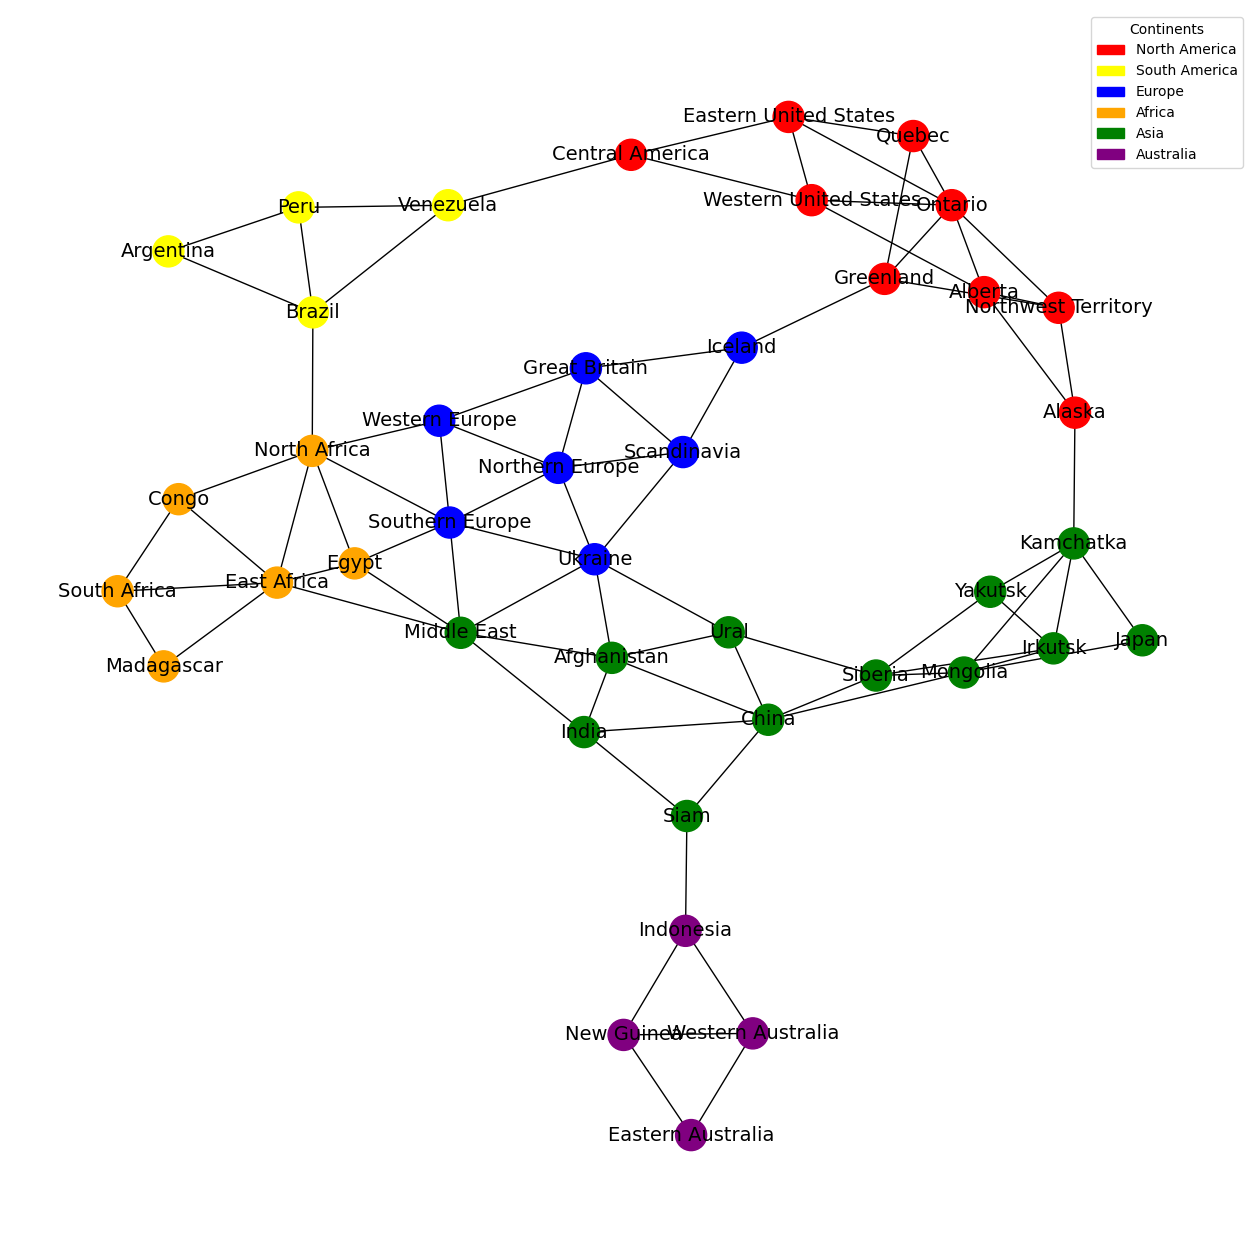

In [41]:
colors = {
    'North America': 'red',
    'South America': 'yellow',
    'Europe': 'blue',
    'Africa': 'orange',
    'Asia': 'green',
    'Australia': 'purple'
}


import matplotlib.patches as mpatches


def visualize_risk_graph(G, layout):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board

        layout (string): the layoout the user wants
    """
    # Your code here
    node_colors = [] #this is a list which we will add continent-color pairs to
    for node_name in G.nodes():
        #here I asked ChatGPT 4o 'how could I color nodes based on continent', asking the same instance as I asked the prior questions to
        #I then used that as a guide but still wrote what is below
        node_colors.append(colors[G.nodes[node_name]['continent']]) # this is like saying 'take the continent of this node from the nodes in G, see what color it maps to, and add that to node_colors'


    #this is a series of if and elif statments, to where if the user puts in one of these layouts, the layout will be set to it. This will also default to 'spring' if the given layout is not recognized
    if layout == "spring":
        pos = nx.spring_layout(G)
    elif layout == "circular":
        pos = nx.circular_layout(G)
    elif layout == "kamada_kaway":
        pos = nx.kamada_kawai_layout(G)
    elif layout == "random":
        pos = nx.random_layout(G)
    elif layout == "shell":
        pos = nx.shell_layout(G)
    else:
        pos = nx.spring_layout(G)



    #I asked ChatGPT 4o 'how would I create a legend of the colors for continets?', it gave the next three lines as one line, which was confusing so I broke it down for simplicity
    legend_patches = [] #this will be the list of the different colors in our legend and what their labels are
    for continent, color in colors.items(): #this goes through our color map
        legend_patches.append(mpatches.Patch(color=color, label=continent)) #to my understanding, as Chat did help write this, 'patches' are like rows in the legend, so one shape or color and then the label of what it stands for
        #so this above line takes a color and the correspodning country, and makes a row of the legend be that color next to the label being that country

    # Add legend
    plt.legend(handles=legend_patches, title="Continents") #'handles' are the entries of the legend, so we add the list we made that has all the color countinent pairs
    
    nx.draw(G, node_color=node_colors, with_labels = True, pos = pos, node_size=500, font_size=14)


# Visualize the graph
plt.figure(figsize = (16,16))
visualize_risk_graph(G, 'kamada_kaway')


&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

✎ 

**Answer to 1:** the Kamada-Kawai layout appears to be the best, because while the grouping of regions are not in the locations they are on the board (it very consistently had everything rotated 90 degrees), there are obvious groupings of each continent, made especially visible by the colors. Also it spreads out the nodes enough so that you can read the labels, with there consistently being one location with labels overlapping which was New Guinea and Western Australia. there was also very few places where overlapping edges made it difficult to read, most notably up in North America it was slightly jumbled but overall not that bad.


**Answer to 2:** kamada-kawai layout appears to model the edges between nodes as forces, and tries to decrease the energy of the system. One place described it as the nodes are springs, so this model will prevent super long nodes as there would be lots of energy/force there. By physically models it as such you can find one best state where in theory all connected nodes should be roughly near the nodes they are connected to and an aesthetically pleasing layout.

sources: 
- https://en.wikipedia.org/wiki/Force-directed_graph_drawing
- asked ChatGPT 4o 'can you tell me about the kamada-kawai layout and what it does?'
- https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=b8d3bca50ccc573c5cb99f7d201e8acce6618f04


**Answer to 3:** In creating the nodes, I had change it so they were given a continent variable, as otherwise it would have been a headache to look through all the dictionaries to find which one had the node. Then as the very first section of code in the function, A for loop goes through each country (aka each node in G), and as I said in the comment the line of code that runs for each node is like saying 'take the continent of this node, see what color it maps to, and add that to node_colors'. For this to work I created a dictionary 'colors' which just maps each continent to a color (aka put 'North America' in, get 'red' out), as well as a list 'node colors', which we put the colors of nodes into. the draw function takes in a list of colors and maps the first one to the first node, second to the second, and so on, and because we go through the list of nodes in the same order this works perfectly.

``` python

for continent in (territories): #this goes through each continent
        for country in (territories[continent]): #now goes through every country name
            G.add_node(country, continent = continent) #adds a node for each country, also keeps track of continent of each node

...

colors = {
    'North America': 'red',
    'South America': 'yellow',
    'Europe': 'blue',
    'Africa': 'orange',
    'Asia': 'green',
    'Australia': 'purple'

...

    node_colors = [] #this is a list which we will add continent-color pairs to
    for node_name in G.nodes():#here I asked ChatGPT 4o 'how could I color nodes based on continent', asking the same instance as I asked the prior questions to
        #I then used that as a guide but still wrote what is below
        node_colors.append(colors[G.nodes[node_name]['continent']]) #to my understanding, as Chat did help write this, 'patches' are like rows in the legend, so one shape or color and then the label of what it stands for
        #so this above line takes a color and the correspodning country, and makes a row of the legend be that color next to the label being that country
    
}
```


**Answer to 4:** as mentioned above we created a color map that takes a continent as a key in the dictionary and then returns its corresponding color. I struggled with this for a bit before having ChatGPT 4o help, I have added comments above explaining how it works but essentially we can use out earlier color plot to make 'patches', which is a type of color/shape and label pair that can be passed into plt.legend to make a custom legend with those pairings. In our case, we just need a color and its label, which we add to a list. this is the list that can be assigned to 'handles' when making our legend, which just tells plt.legend to use this set of patches.

``` python
legend_patches = [] #this will be the list of the different colors in our legend and what their labels are
    for continent, color in colors.items(): #this goes through our color map
        legend_patches.append(mpatches.Patch(color=color, label=continent)) #to my understanding, as Chat did help write this, 'patches' are like rows in the legend, so one shape or color and then the label of what it stands for
        #so this above line takes a color and the correspodning country, and makes a row of the legend be that color next to the label being that country

    # Add legend
    plt.legend(handles=legend_patches, title="Continents") #'handles' are the entries of the legend, so we add the list we made that has all the color countinent pairs
```


**Answer to 5:** I created a color map that reflected the colors of the continents on the risk game board, using a dictionary as you put in a continent and get out its color. I didn't need to import anything this way, and this ended up working nicely with the other 2 parts where I could easily make the legend using .items as well as easily assemble the list that would be used for assigning colors.
``` python
colors = {
    'North America': 'red',
    'South America': 'yellow',
    'Europe': 'blue',
    'Africa': 'orange',
    'Asia': 'green',
    'Australia': 'purple'
}
```

**Answer to 6:** This was as easy and setting parameters in nx.draw(). You can see that I turned on labels (with_labels = True), set the font size to 14 (font_size=14), and set node size to 500 (node_size=500)
``` python
x.draw(G, node_color=node_colors, with_labels = True, pos = pos, node_size=500, font_size=14)
```

**Answer to 7:** as shown and answered above, you can set 
``` python
with_labels = True
```
when drawing a node network and it will automatically put the names of the nodes on them, and as we  

---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [5]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University